Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Downloading dataset fro my local computer

In [ ]:
from google.colab import files
upload = files.upload()

Saving Coronavirus_COVID-19_Cases.csv to Coronavirus_COVID-19_Cases.csv


Saving dataset into a Pandas Dataframe

In [ ]:
data = pd.read_csv('Coronavirus_COVID-19_Cases.csv',index_col = False)

In [ ]:
data.head(10)

,X,Y,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key
0,67.709953,33.93911,1,NaN,Afghanistan,2020/09/05 09:28:32+00,33.93911,67.709953,38324,30082,1409,6833,NaN,NaN,Afghanistan
1,20.168300,41.15330,2,NaN,Albania,2020/09/05 09:28:32+00,41.15330,20.168300,9967,5882,306,3779,NaN,NaN,Albania
2,1.659600,28.03390,3,NaN,Algeria,2020/09/05 09:28:32+00,28.03390,1.659600,45773,32259,1539,11975,NaN,NaN,Algeria
3,1.521800,42.50630,4,NaN,Andorra,2020/09/05 09:28:32+00,42.50630,1.521800,1215,928,53,234,NaN,NaN,Andorra
4,17.873900,-11.20270,5,NaN,Angola,2020/09/05 09:28:32+00,-11.20270,17.873900,2876,1167,115,1594,NaN,NaN,Angola
5,-61.796400,17.06080,6,NaN,Antigua and Barbuda,2020/09/05 09:28:32+00,17.06080,-61.796400,95,91,3,1,NaN,NaN,Antigua and Barbuda
6,-63.616700,-38.41610,7,NaN,Argentina,2020/09/05 09:28:32+00,-38.41610,-63.616700,461882,331621,9623,120638,NaN,NaN,Argentina
7,45.038200,40.06910,8,NaN,Armenia,2020/09/05 09:28:32+00,40.06910,45.038200,44649,39823,895,3931,NaN,NaN,Armenia
8,149.012400,-35.47350,9,Australian Capital Territory,Australia,2020/09/05 09:28:32+00,-35.47350,149.012400,113,110,3,0,NaN,NaN,"Australian Capital Territory, Australia"
9,151.209300,-33.86880,10,New South Wales,Australia,2020/09/05 09:28:32+00,-33.86880,151.209300,4104,2994,52,1058,NaN,NaN,"New South Wales, Australia"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               731 non-null    float64
 1   Y               731 non-null    float64
 2   OBJECTID        744 non-null    int64  
 3   Province_State  576 non-null    object 
 4   Country_Region  744 non-null    object 
 5   Last_Update     744 non-null    object 
 6   Lat             731 non-null    float64
 7   Long_           731 non-null    float64
 8   Confirmed       744 non-null    int64  
 9   Recovered       744 non-null    int64  
 10  Deaths          744 non-null    int64  
 11  Active          744 non-null    int64  
 12  Admin2          0 non-null      float64
 13  FIPS            52 non-null     float64
 14  Combined_Key    744 non-null    object 
dtypes: float64(6), int64(5), object(4)
memory usage: 87.3+ KB


**Part 1 — Ranking Most affected countries**

**(i) Top 10 Confirmed Cases Countries:**

In [ ]:
confirmed = data.groupby('Country_Region')['Confirmed'].sum().to_frame().reset_index()

In [ ]:
confirmed.head()

,Country_Region,Confirmed
174,US,6202080
23,Brazil,4091801
79,India,4023179
140,Russia,1017131
134,Peru,676848


In [ ]:
confirmed = confirmed.sort_values(by = 'Confirmed', ascending=False).head(10)

In [ ]:
confirmed_ = list(confirmed['Country_Region'].values)

In [ ]:
print('The top 10 Confirmed cases Countries are' ,confirmed_)

The top 10 Confirmed cases Countries are ['US', 'Brazil', 'India', 'Russia', 'Peru', 'Colombia', 'South Africa', 'Mexico', 'Spain', 'Argentina']




**(ii) Top 10 Death Cases Countries:**

In [ ]:
death = data.groupby('Country_Region')['Deaths'].sum().to_frame().reset_index()

In [ ]:
death = death.sort_values(by = 'Deaths', ascending=False).head(10)

In [ ]:
death_ = list(death['Country_Region'].values)

In [ ]:
print('The Top 10 Death cases Countries are: ', death_)

The Top 10 Death cases Countries are:  ['US', 'Brazil', 'India', 'Mexico', 'United Kingdom', 'Italy', 'France', 'Peru', 'Spain', 'Iran']


**(iii) Top 10 Recovered Cases Countries:**

In [ ]:
recovered = data.groupby('Country_Region')['Recovered'].sum().to_frame().reset_index()

In [ ]:
recovered = recovered.sort_values(by = 'Recovered', ascending= False).head(10)

In [ ]:
recovered_ = list(recovered['Country_Region'].values)

In [ ]:
print('The Top 10 Recovered Countries are: ', recovered_)

The Top 10 Recovered Countries are:  ['Brazil', 'India', 'US', 'Russia', 'South Africa', 'Mexico', 'Peru', 'Colombia', 'Chile', 'Argentina']


**(iv) Top 10 Active Cases Countries:**

In [ ]:
active = data.groupby('Country_Region')['Active'].sum().to_frame().reset_index()

In [ ]:
active = active.sort_values(by = 'Active', ascending=False).head(10)

In [ ]:
active_ = list(active['Country_Region'].values)

In [ ]:
print('The Top 10 Active cases Countries are: ', active_)

The Top 10 Active cases Countries are:  ['US', 'India', 'Brazil', 'Spain', 'United Kingdom', 'France', 'Russia', 'Peru', 'Colombia', 'Argentina']


**Part 2 — Ranking most affected States in largely affected Countries:**

**(i) Most affected States in the USA:**

In [ ]:
usa = data.loc[data['Country_Region']== 'US']

In [ ]:
usa.head()

,X,Y,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key
684,-89.678696,32.741646,685,Mississippi,US,2020/09/05 09:28:32+00,32.741646,-89.678696,85939,0,2558,83381,NaN,28.0,"Mississippi, US"
685,-122.665479,37.648940,686,Grand Princess,US,2020/08/04 02:27:56+00,37.648940,-122.665479,103,0,3,100,NaN,NaN,"Grand Princess, US"
686,-96.928917,35.565342,687,Oklahoma,US,2020/09/05 09:28:32+00,35.565342,-96.928917,62040,0,846,61194,NaN,40.0,"Oklahoma, US"
687,-75.507141,39.318523,688,Delaware,US,2020/09/05 09:28:32+00,39.318523,-75.507141,17752,0,606,17146,NaN,10.0,"Delaware, US"
688,-93.900192,45.694454,689,Minnesota,US,2020/09/05 09:28:32+00,45.694454,-93.900192,78966,0,1899,77067,NaN,27.0,"Minnesota, US"


In [ ]:
usa.shape

(60, 15)

In [ ]:
usa[usa.duplicated(subset= ['Province_State'], keep = False)]

,X,Y,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key


In [ ]:
#Since there are no duplicated States, we can just go ahead and sort values by Confirmed cases
usa_states = usa.sort_values(by = 'Confirmed', ascending = False)[['Province_State', 'Confirmed']].head(10)

In [ ]:
usa_states

,Province_State,Confirmed
701,California,731831
694,Texas,651350
734,Florida,640211
716,New York,437971
703,Georgia,279354
689,Illinois,247298
723,Arizona,204681
713,New Jersey,193422
741,North Carolina,174253
708,Tennessee,160597


**(ii) Most affected States in Brazil:**

In [ ]:
brazil = data.loc[data['Country_Region']== 'Brazil']

In [ ]:
brazil[brazil.duplicated(subset= ['Province_State'], keep = False)]

,X,Y,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key


In [ ]:
#Since there are no duplicated States, we can just go ahead and sort values by Confirmed cases
brazil_states = brazil.sort_values(by = 'Confirmed', ascending = False)[['Province_State', 'Confirmed']].head(10)

In [ ]:
brazil_states

,Province_State,Confirmed
54,Sao Paulo,845016
34,Bahia,268137
50,Rio de Janeiro,232489
35,Ceara,230105
42,Minas Gerais,228013
43,Para,205291
53,Santa Catarina,186596
36,Distrito Federal,167200
39,Maranhao,157052
38,Goias,145250


**(iii) Most affected States in India:**

In [ ]:
india = data.loc[data['Country_Region']== 'India']

In [ ]:
india[india.duplicated(subset= ['Province_State'], keep = False)]

,X,Y,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key


In [ ]:
#Since there are no duplicated States, we can just go ahead and sort values by Confirmed cases
india_states = india.sort_values(by = 'Confirmed', ascending = False)[['Province_State', 'Confirmed']].head(10)

In [ ]:
india_states

,Province_State,Confirmed
253,Maharashtra,863062
234,Andhra Pradesh,476506
263,Tamil Nadu,451827
248,Karnataka,379486
267,Uttar Pradesh,253175
241,Delhi,185220
269,West Bengal,174659
237,Bihar,144104
264,Telangana,138395
236,Assam,121224


**(iv) Most affected States in Russia:**

In [ ]:
russia = data.loc[data['Country_Region']== 'Russia']

In [ ]:
russia[russia.duplicated(subset= ['Province_State'], keep = False)]

,X,Y,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key


In [ ]:
#Since there are no duplicated States, we can just go ahead and sort values by Confirmed cases
russia_states = russia.sort_values(by = 'Confirmed', ascending = False)[['Province_State', 'Confirmed']].head(10)

In [ ]:
russia_states

,Province_State,Confirmed
518,Moscow,265737
519,Moscow Oblast,69032
535,Saint Petersburg,37620
522,Nizhny Novgorod Oblast,28409
542,Sverdlovsk Oblast,25910
505,Khanty-Mansi Autonomous Okrug,19967
533,Rostov Oblast,17630
510,Krasnoyarsk Krai,17413
492,Irkutsk Oblast,17184
555,Voronezh Oblast,14645


**VISUALIZATIONS**

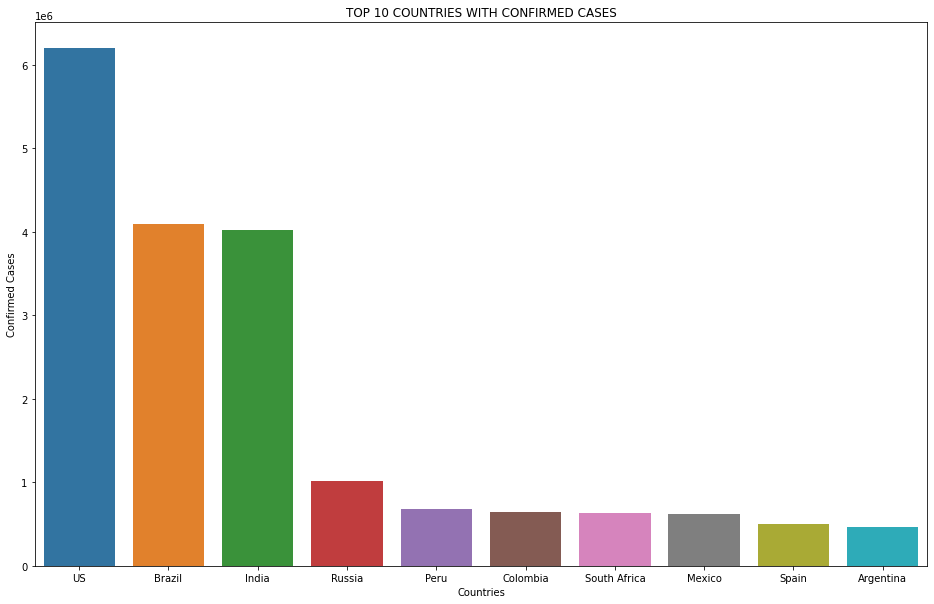

In [ ]:
fig,ax = plt.subplots(figsize = (16,10))
sns.barplot(x= 'Country_Region', y = 'Confirmed', data = confirmed)
ax.set_title('TOP 10 COUNTRIES WITH CONFIRMED CASES')
ax.set_xlabel('Countries')
ax.set_ylabel('Confirmed Cases')
plt.savefig('Top 10 Countries.png')

In [ ]:
files.download('Top 10 Countries.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

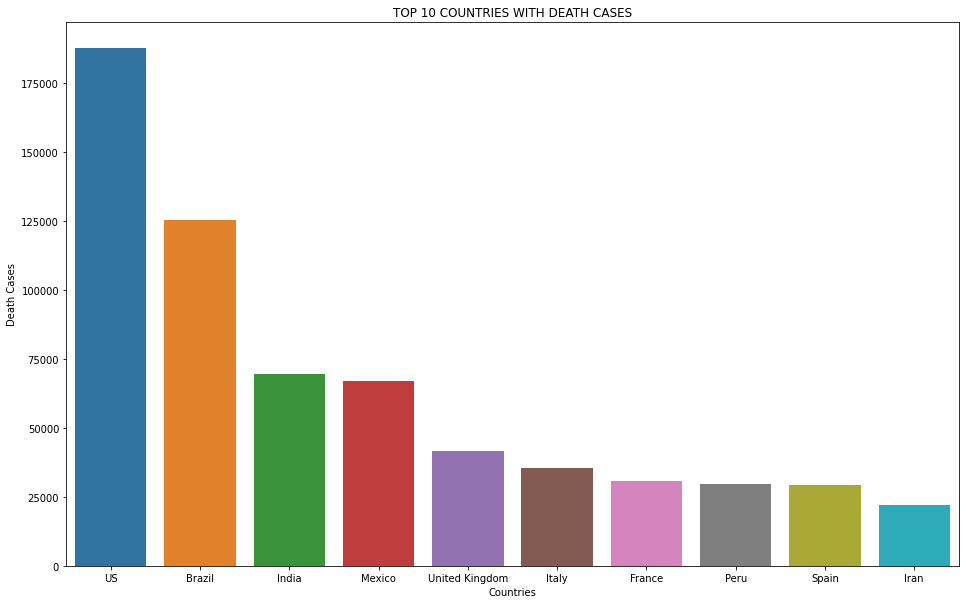

In [74]:
fig,ax = plt.subplots(figsize = (16,10))
sns.barplot(x= 'Country_Region', y = 'Deaths', data = death)
ax.set_title('TOP 10 COUNTRIES WITH DEATH CASES')
ax.set_xlabel('Countries')
ax.set_ylabel('Death Cases')
plt.savefig('Top 10 Death cases Countries.png')

In [75]:
files.download('Top 10 Death cases Countries.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

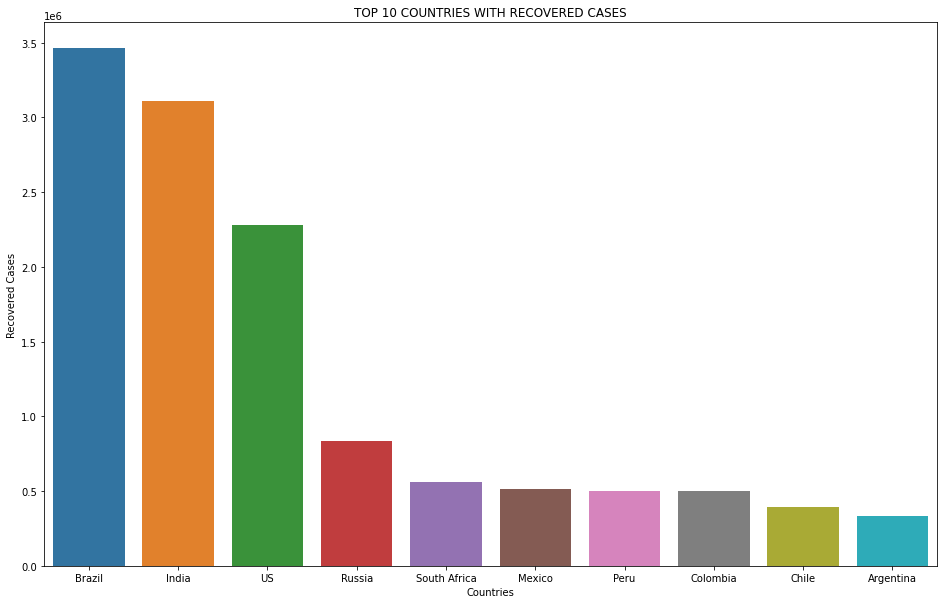

In [76]:
fig,ax = plt.subplots(figsize = (16,10))
sns.barplot(x= 'Country_Region', y = 'Recovered', data = recovered)
ax.set_title('TOP 10 COUNTRIES WITH RECOVERED CASES')
ax.set_xlabel('Countries')
ax.set_ylabel('Recovered Cases')
plt.savefig('Top 10 Countries with recovered cases.png')

In [77]:
files.download('Top 10 Countries with recovered cases.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

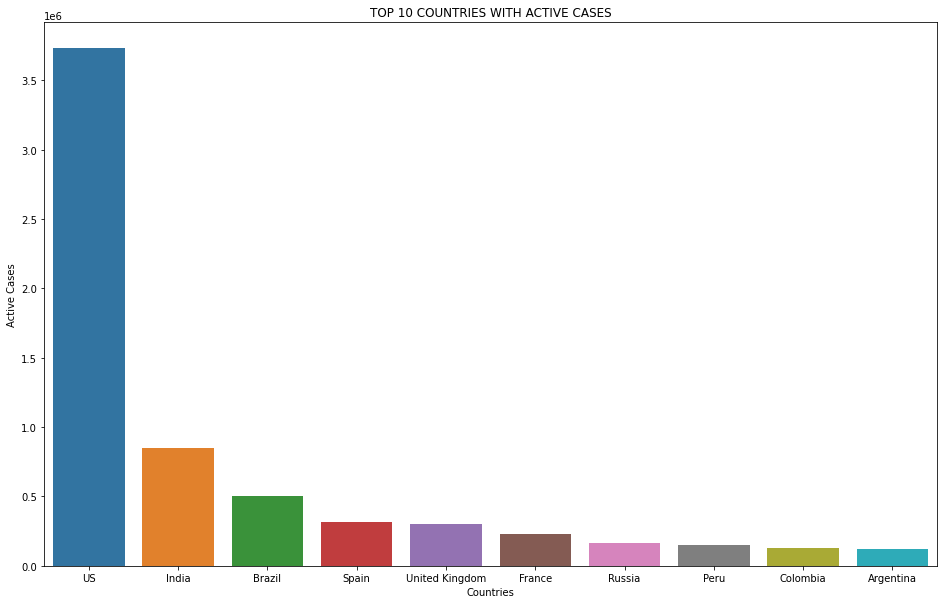

In [78]:
fig,ax = plt.subplots(figsize = (16,10))
sns.barplot(x= 'Country_Region', y = 'Active', data = active)
ax.set_title('TOP 10 COUNTRIES WITH ACTIVE CASES')
ax.set_xlabel('Countries')
ax.set_ylabel('Active Cases')
plt.savefig('Top 10 Countries with active cases.png')

In [79]:
files.download('Top 10 Countries with active cases.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
usa_states.head()

,Province_State,Confirmed
701,California,731831
694,Texas,651350
734,Florida,640211
716,New York,437971
703,Georgia,279354


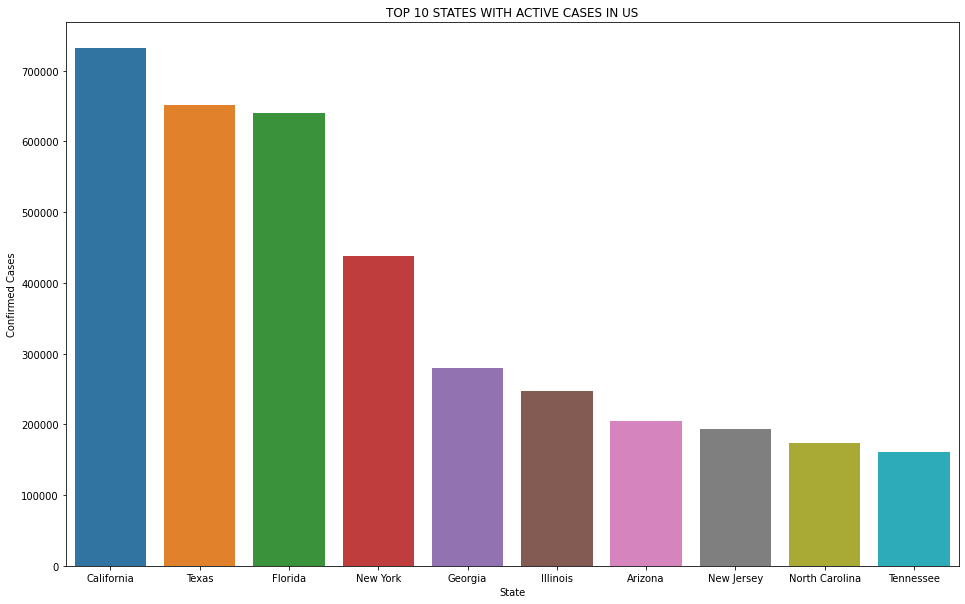

In [84]:
fig,ax = plt.subplots(figsize = (16,10))
sns.barplot(x= 'Province_State', y = 'Confirmed', data = usa_states)
ax.set_title('TOP 10 STATES WITH ACTIVE CASES IN US')
ax.set_xlabel('State')
ax.set_ylabel('Confirmed Cases')
fig.savefig('Top 10 States in the US.png')

In [85]:
files.download('Top 10 States in the US.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

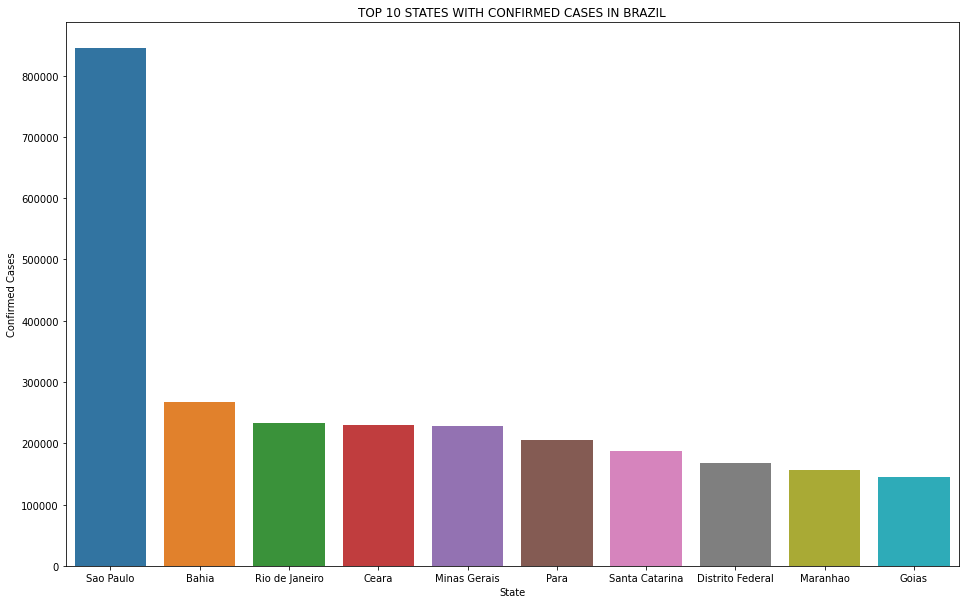

In [86]:
fig,ax = plt.subplots(figsize = (16,10))
sns.barplot(x= 'Province_State', y = 'Confirmed', data = brazil_states)
ax.set_title('TOP 10 STATES WITH CONFIRMED CASES IN BRAZIL')
ax.set_xlabel('State')
ax.set_ylabel('Confirmed Cases')
fig.savefig('Top 10 States in Brazil.png')

In [87]:
files.download('Top 10 States in Brazil.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

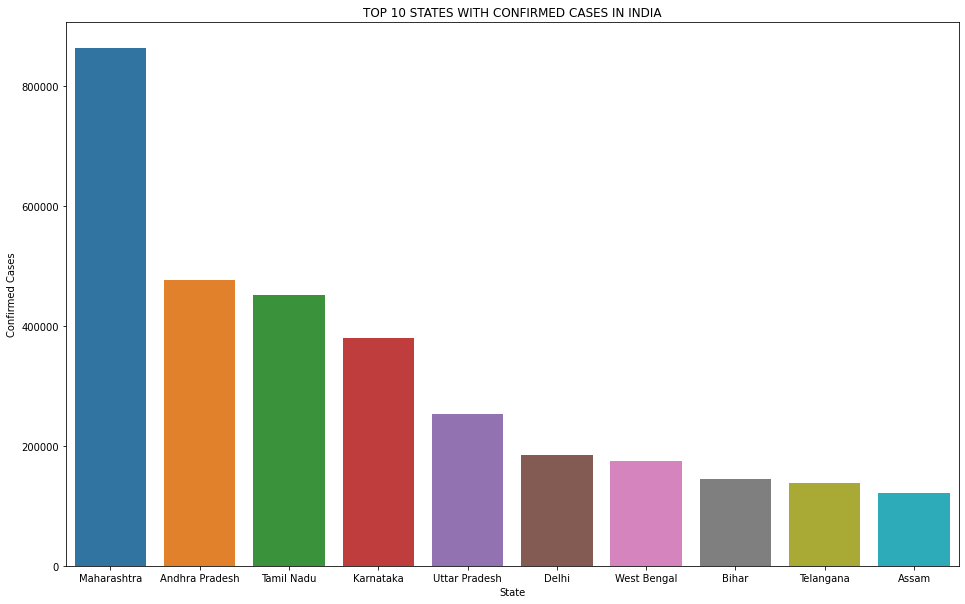

In [89]:
fig,ax = plt.subplots(figsize = (16,10))
sns.barplot(x= 'Province_State', y = 'Confirmed', data = india_states)
ax.set_title('TOP 10 STATES WITH CONFIRMED CASES IN INDIA')
ax.set_xlabel('State')
ax.set_ylabel('Confirmed Cases')
fig.savefig('Top 10 States in India.png')

In [90]:
files.download('Top 10 States in India.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

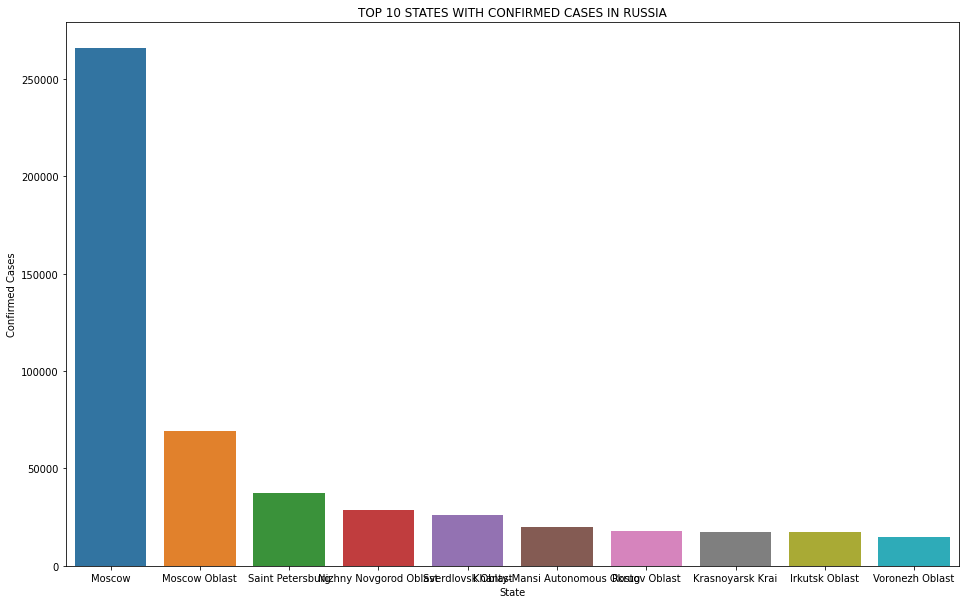

In [91]:
fig,ax = plt.subplots(figsize = (16,10))
sns.barplot(x= 'Province_State', y = 'Confirmed', data = russia_states)
ax.set_title('TOP 10 STATES WITH CONFIRMED CASES IN RUSSIA')
ax.set_xlabel('State')
ax.set_ylabel('Confirmed Cases')
fig.savefig('Top 10 States in Russia.png')

In [92]:
files.download('Top 10 States in Russia.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>